In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from datetime import datetime
import seaborn as sns



In [3]:
data = pd.read_csv("data/b8aeb030-140d-43d2-aa29-1a80862e3d62.csv")
data

,_id,OBJECTID,* Damage,* Street Number,* Street Name,"* Street Type (e.g. road, drive, lane, etc.)","Street Suffix (e.g. apt. 23, blding C)",* City,State,Zip Code,...,Fire Name (Secondary),APN (parcel),Assessed Improved Value (parcel),Year Built (parcel),Site Address (parcel),GLOBALID,Latitude,Longitude,x,y
0,1,1,No Damage,8376.0,Quail Canyon,Road,NaN,Winters,CA,NaN,...,Quail,0101090290,510000.0,1997.0,8376 QUAIL CANYON RD VACAVILLE CA 95688,e1919a06-b4c6-476d-99e5-f0b45b070de8,38.474960,-122.044465,-1.358593e+07,4.646741e+06
1,2,2,Affected (1-9%),8402.0,Quail Canyon,Road,NaN,Winters,CA,NaN,...,Quail,0101090270,573052.0,1980.0,8402 QUAIL CANYON RD VACAVILLE CA 95688,b090eeb6-5b18-421e-9723-af7c9144587c,38.477442,-122.043252,-1.358579e+07,4.647094e+06
2,3,3,No Damage,8430.0,Quail Canyon,Road,NaN,Winters,CA,NaN,...,Quail,0101090310,350151.0,2004.0,8430 QUAIL CANYON RD VACAVILLE CA 95688,268da70b-753f-46aa-8fb1-327099337395,38.479358,-122.044585,-1.358594e+07,4.647366e+06
3,4,4,No Damage,3838.0,Putah Creek,Road,NaN,Winters,CA,NaN,...,Quail,0103010240,134880.0,1981.0,3838 PUTAH CREEK RD WINTERS CA 95694,64d4a278-5ee9-414a-8bf4-247c5b5c60f9,38.487313,-122.015115,-1.358266e+07,4.648497e+06
4,5,5,No Damage,3830.0,Putah Creek,Road,NaN,Winters,CA,NaN,...,Quail,0103010220,346648.0,1980.0,3830 PUTAH CREEK RD WINTERS CA 95694,1b44b214-01fd-4f06-b764-eb42a1ec93d7,38.485636,-122.016122,-1.358277e+07,4.648259e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100225,100226,101217,No Damage,24198.0,Case,Court,blding A,Malibu,CA,90265.0,...,NaN,4458018039.0,2249521.0,0.0,"24198 CASE CT, MALIBU, CA 90265",1b537de2-8b97-43ee-9d5c-c5a426f604f1,34.033408,-118.700625,-1.321369e+07,4.033289e+06
100226,100227,101218,No Damage,24198.0,Case,Court,blding B,Malibu,CA,90265.0,...,NaN,4458018039.0,2249521.0,0.0,"24198 CASE CT, MALIBU, CA 90265",56e3cc8b-4bf0-4beb-bd26-b54422cc31ee,34.033278,-118.700902,-1.321372e+07,4.033271e+06
100227,100228,101219,No Damage,24198.0,Case,Court,blding C,Malibu,CA,90265.0,...,NaN,4458018039.0,2249521.0,0.0,"24198 CASE CT, MALIBU, CA 90265",f85e9f02-a67f-4a7d-9fa1-0b8bf419d51a,34.033618,-118.701102,-1.321375e+07,4.033317e+06
100228,100229,101220,No Damage,24008.0,Malibu,Road,NaN,Malibu,CA,90265.0,...,NaN,4458009014.0,5983875.0,2016.0,"24008 MALIBU RD, MALIBU, CA 90265",51b2df1f-852e-4f36-b250-b383c93e4042,34.032085,-118.698270,-1.321343e+07,4.033111e+06


In [4]:
data.columns

Index(['_id', 'OBJECTID', '* Damage', '* Street Number', '* Street Name',
       '* Street Type (e.g. road, drive, lane, etc.)',
       'Street Suffix (e.g. apt. 23, blding C)', '* City', 'State', 'Zip Code',
       '* CAL FIRE Unit', 'County', 'Community', 'Battalion',
       '* Incident Name', 'Incident Number (e.g. CAAEU 123456)',
       'Incident Start Date', 'Hazard Type',
       'If Affected 1-9% - Where did fire start?',
       'If Affected 1-9% - What started fire?',
       'Structure Defense Actions Taken', '* Structure Type',
       'Structure Category', '# Units in Structure (if multi unit)',
       '# of Damaged Outbuildings < 120 SQFT',
       '# of Non Damaged Outbuildings < 120 SQFT', '* Roof Construction',
       '* Eaves', '* Vent Screen', '* Exterior Siding', '* Window Pane',
       '* Deck/Porch On Grade', '* Deck/Porch Elevated',
       '* Patio Cover/Carport Attached to Structure',
       '* Fence Attached to Structure', 'Distance - Propane Tank to Structure',
    

In [5]:
data.isnull().sum()

_id                                                                 0
OBJECTID                                                            0
* Damage                                                            0
* Street Number                                                  4420
* Street Name                                                    5486
* Street Type (e.g. road, drive, lane, etc.)                    13197
Street Suffix (e.g. apt. 23, blding C)                          56082
* City                                                          31614
State                                                               7
Zip Code                                                        52801
* CAL FIRE Unit                                                     0
County                                                             30
Community                                                       47338
Battalion                                                       93832
* Incident Name     

## dropping columns with high missing values

In [6]:
columns_will_drop = ['Street Suffix (e.g. apt. 23, blding C)',  
    'Community',  
    'Battalion',  
    'If Affected 1-9% - Where did fire start?',  
    'If Affected 1-9% - What started fire?',  
    'Structure Defense Actions Taken',  
    '# Units in Structure (if multi unit)',  
    '# of Damaged Outbuildings < 120 SQFT',  
    '# of Non Damaged Outbuildings < 120 SQFT',  
    'Distance - Propane Tank to Structure',  
    'Distance - Residence to Utility/Misc Structure &gt; 120 SQFT',  
    'Fire Name (Secondary)']

In [7]:
data.drop(columns_will_drop,axis=1,inplace=True)

In [8]:
data.isnull().sum()

_id                                                 0
OBJECTID                                            0
* Damage                                            0
* Street Number                                  4420
* Street Name                                    5486
* Street Type (e.g. road, drive, lane, etc.)    13197
* City                                          31614
State                                               7
Zip Code                                        52801
* CAL FIRE Unit                                     0
County                                             30
* Incident Name                                     0
Incident Number (e.g. CAAEU 123456)                 0
Incident Start Date                                 0
Hazard Type                                         0
* Structure Type                                    0
Structure Category                                  0
* Roof Construction                               628
* Eaves                     

# dropping non important columns for analysis and visualization 
- ['_id', 'OBJECTID', 'GLOBALID', 'x', 'y'] : Technical identifiers and redundant location.
- ['Incident Number (e.g. CAAEU 123456)] : Tracking individual incidents might not be insightful.
- ['Zip Code', 'Site Address (parcel)']  :   Redundant with latitude/longitude.
- [ '* Roof Construction', '* Eaves', '* Vent Screen',
'* Exterior Siding', '* Window Pane', '* Patio Cover/Carport Attached to Structure',
'* Deck/Porch On Grade', '* Deck/Porch Elevated']  : Structural features better suited for engineering studies.


In [9]:
non_important_columns = [
    '_id', 'OBJECTID', 'GLOBALID', 'x', 'y',  
    'Incident Number (e.g. CAAEU 123456)',    
    '* Street Number', '* Street Name', '* Street Type (e.g. road, drive, lane, etc.)',
    'Zip Code', 'Site Address (parcel)',      
    '* Roof Construction', '* Eaves', '* Vent Screen',
    '* Exterior Siding', '* Window Pane', '* Patio Cover/Carport Attached to Structure',
    '* Deck/Porch On Grade', '* Deck/Porch Elevated'  
]


In [10]:
data.drop(non_important_columns,axis=1,inplace=True)

In [11]:
data

,* Damage,* City,State,* CAL FIRE Unit,County,* Incident Name,Incident Start Date,Hazard Type,* Structure Type,Structure Category,* Fence Attached to Structure,APN (parcel),Assessed Improved Value (parcel),Year Built (parcel),Latitude,Longitude
0,No Damage,Winters,CA,LNU,Solano,Quail,6/6/2020 12:00:00 AM,Fire,Single Family Residence Multi Story,Single Residence,No Fence,0101090290,510000.0,1997.0,38.474960,-122.044465
1,Affected (1-9%),Winters,CA,LNU,Solano,Quail,6/6/2020 12:00:00 AM,Fire,Single Family Residence Single Story,Single Residence,Combustible,0101090270,573052.0,1980.0,38.477442,-122.043252
2,No Damage,Winters,CA,LNU,Solano,Quail,6/6/2020 12:00:00 AM,Fire,Single Family Residence Single Story,Single Residence,No Fence,0101090310,350151.0,2004.0,38.479358,-122.044585
3,No Damage,Winters,CA,LNU,Solano,Quail,6/6/2020 12:00:00 AM,Fire,Single Family Residence Single Story,Single Residence,No Fence,0103010240,134880.0,1981.0,38.487313,-122.015115
4,No Damage,Winters,CA,LNU,Solano,Quail,6/6/2020 12:00:00 AM,Fire,Single Family Residence Single Story,Single Residence,No Fence,0103010220,346648.0,1980.0,38.485636,-122.016122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100225,No Damage,Malibu,CA,LAC,Los Angeles,Franklin,12/9/2024 12:00:00 AM,Fire,Single Family Residence Single Story,Single Residence,No Fence,4458018039.0,2249521.0,0.0,34.033408,-118.700625
100226,No Damage,Malibu,CA,LAC,Los Angeles,Franklin,12/9/2024 12:00:00 AM,Fire,Utility Misc Structure,Other Minor Structure,No Fence,4458018039.0,2249521.0,0.0,34.033278,-118.700902
100227,No Damage,Malibu,CA,LAC,Los Angeles,Franklin,12/9/2024 12:00:00 AM,Fire,Single Family Residence Single Story,Single Residence,Unknown,4458018039.0,2249521.0,0.0,34.033618,-118.701102
100228,No Damage,Malibu,CA,LAC,Los Angeles,Franklin,12/9/2024 12:00:00 AM,Fire,Single Family Residence Multi Story,Single Residence,Combustible,4458009014.0,5983875.0,2016.0,34.032085,-118.698270


In [12]:
data.isnull().sum()

* Damage                                0
* City                              31614
State                                   7
* CAL FIRE Unit                         0
County                                 30
* Incident Name                         0
Incident Start Date                     0
Hazard Type                             0
* Structure Type                        0
Structure Category                      0
* Fence Attached to Structure       21595
APN (parcel)                          617
Assessed Improved Value (parcel)     6035
Year Built (parcel)                 30418
Latitude                                0
Longitude                               0
dtype: int64

# modify columns names

In [13]:
data.columns = data.columns.str.replace(r'\*|\s+', '', regex=True)


In [14]:
data

,Damage,City,State,CALFIREUnit,County,IncidentName,IncidentStartDate,HazardType,StructureType,StructureCategory,FenceAttachedtoStructure,APN(parcel),AssessedImprovedValue(parcel),YearBuilt(parcel),Latitude,Longitude
0,No Damage,Winters,CA,LNU,Solano,Quail,6/6/2020 12:00:00 AM,Fire,Single Family Residence Multi Story,Single Residence,No Fence,0101090290,510000.0,1997.0,38.474960,-122.044465
1,Affected (1-9%),Winters,CA,LNU,Solano,Quail,6/6/2020 12:00:00 AM,Fire,Single Family Residence Single Story,Single Residence,Combustible,0101090270,573052.0,1980.0,38.477442,-122.043252
2,No Damage,Winters,CA,LNU,Solano,Quail,6/6/2020 12:00:00 AM,Fire,Single Family Residence Single Story,Single Residence,No Fence,0101090310,350151.0,2004.0,38.479358,-122.044585
3,No Damage,Winters,CA,LNU,Solano,Quail,6/6/2020 12:00:00 AM,Fire,Single Family Residence Single Story,Single Residence,No Fence,0103010240,134880.0,1981.0,38.487313,-122.015115
4,No Damage,Winters,CA,LNU,Solano,Quail,6/6/2020 12:00:00 AM,Fire,Single Family Residence Single Story,Single Residence,No Fence,0103010220,346648.0,1980.0,38.485636,-122.016122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100225,No Damage,Malibu,CA,LAC,Los Angeles,Franklin,12/9/2024 12:00:00 AM,Fire,Single Family Residence Single Story,Single Residence,No Fence,4458018039.0,2249521.0,0.0,34.033408,-118.700625
100226,No Damage,Malibu,CA,LAC,Los Angeles,Franklin,12/9/2024 12:00:00 AM,Fire,Utility Misc Structure,Other Minor Structure,No Fence,4458018039.0,2249521.0,0.0,34.033278,-118.700902
100227,No Damage,Malibu,CA,LAC,Los Angeles,Franklin,12/9/2024 12:00:00 AM,Fire,Single Family Residence Single Story,Single Residence,Unknown,4458018039.0,2249521.0,0.0,34.033618,-118.701102
100228,No Damage,Malibu,CA,LAC,Los Angeles,Franklin,12/9/2024 12:00:00 AM,Fire,Single Family Residence Multi Story,Single Residence,Combustible,4458009014.0,5983875.0,2016.0,34.032085,-118.698270


# fixing  City Column

In [15]:
data['City'].value_counts()

City
Unincorporated                  16201
Santa Rosa                       3278
Magalia                          2727
Paradise Northwest B             1776
Paradise Central Southwest B     1574
                                ...  
Sonora                              1
Coveli                              1
Byron                               1
Havilah                             1
Cobalt                              1
Name: count, Length: 442, dtype: int64

- Convert city names to title case
- Manually fix any known spelling mistakes
- fill missing with the "Unknown City"


In [16]:
data['City'] = data['City'].str.title()

city_corrections = {
    'Bannig': 'Banning',
}

data['City'] = data['City'].replace(city_corrections)

data['City'] = data['City'].replace('Unincorporated', 'Unknown City')

data['City'].fillna('Unknown City', inplace=True)


In [17]:
data['City'].value_counts()

City
Unknown City                    47815
Santa Rosa                       3278
Magalia                          2727
Paradise Northwest B             1776
Paradise Central Southwest B     1574
                                ...  
Mcdowell                            1
 N/A                                1
 Na                                 1
Eldorado Hills                      1
King City                           1
Name: count, Length: 425, dtype: int64

# fixing County Column

In [18]:
data['County'].isnull().sum()

np.int64(30)

In [19]:
data['County'].value_counts()

County
Butte              28715
Sonoma             11721
Napa                6279
El Dorado           4639
Santa Cruz          4637
Shasta              3781
Los Angeles         3770
Plumas              3585
Ventura             3423
Lake                3140
Fresno              2917
Orange              2510
Solano              2377
Siskiyou            1810
Kern                1476
Riverside           1226
Mariposa            1139
Tehama              1119
Calaveras           1090
Tulare              1020
Lassen               964
Mendocino            937
San Diego            933
San Bernardino       922
Madera               740
Monterey             699
Placer               606
Santa Clara          589
Trinity              572
Alpine               415
Santa Barbara        362
Nevada               344
Yuba                 324
Yolo                 278
Stanislaus           224
San Mateo            207
Alameda              120
San Joaquin          104
San Luis Obispo      103
Amador            

In [20]:
data.dropna(subset=['County'], inplace=True)
# drop those 30 nulls
data['County'] = data['County'].str.title()


In [21]:
data.isnull().sum()

Damage                               0
City                                 0
State                                7
CALFIREUnit                          0
County                               0
IncidentName                         0
IncidentStartDate                    0
HazardType                           0
StructureType                        0
StructureCategory                    0
FenceAttachedtoStructure         21595
APN(parcel)                        617
AssessedImprovedValue(parcel)     6029
YearBuilt(parcel)                30388
Latitude                             0
Longitude                            0
dtype: int64

In [22]:
data['State'].fillna("CA",axis=0,inplace=True)

# dropping State column bec it's only CA 

In [23]:
data.drop('State',axis=1,inplace=True)

# modify data types

In [24]:
data.dtypes

Damage                            object
City                              object
CALFIREUnit                       object
County                            object
IncidentName                      object
IncidentStartDate                 object
HazardType                        object
StructureType                     object
StructureCategory                 object
FenceAttachedtoStructure          object
APN(parcel)                       object
AssessedImprovedValue(parcel)    float64
YearBuilt(parcel)                float64
Latitude                         float64
Longitude                        float64
dtype: object

# last step in cleaning 

In [25]:
# Drop APN(parcel) since it's not useful for analysis
data.drop(['APN(parcel)'], axis=1, inplace=True)

# Fill missing values in AssessedImprovedValue(parcel) with the median
data['AssessedImprovedValue(parcel)'].fillna(data['AssessedImprovedValue(parcel)'].median(), inplace=True)

# Fill missing values in YearBuilt(parcel) with the mode (most common year)
data['YearBuilt(parcel)'].fillna(data['YearBuilt(parcel)'].mode()[0], inplace=True)

# Fill missing values in FenceAttachedtoStructure with 'Unknown'
data['FenceAttachedtoStructure'].fillna('Unknown', inplace=True)


In [26]:
data.isnull().sum()

Damage                           0
City                             0
CALFIREUnit                      0
County                           0
IncidentName                     0
IncidentStartDate                0
HazardType                       0
StructureType                    0
StructureCategory                0
FenceAttachedtoStructure         0
AssessedImprovedValue(parcel)    0
YearBuilt(parcel)                0
Latitude                         0
Longitude                        0
dtype: int64

# 1- Damage Analysis

- What are the most common levels of damage across California fire incidents?


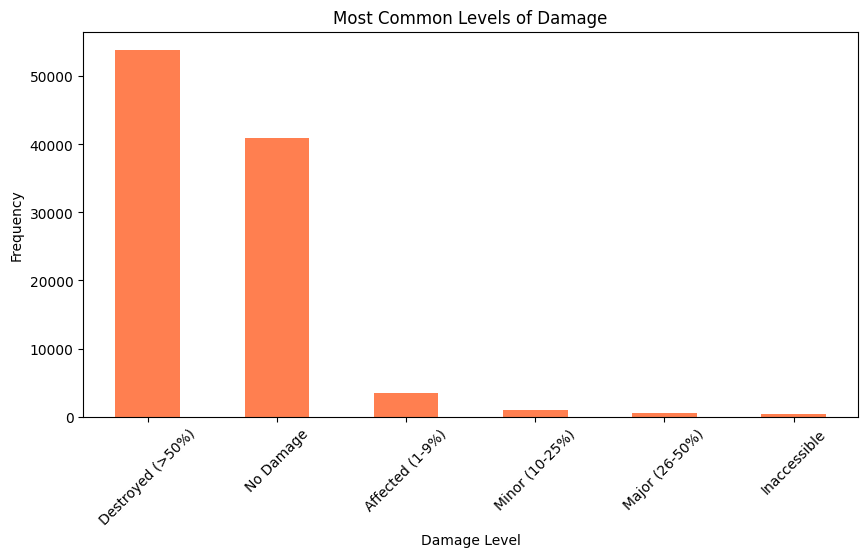

In [27]:
damage_counts = data['Damage'].value_counts()
plt.figure(figsize=(10, 5))
damage_counts.plot(kind='bar', color='coral')
plt.title('Most Common Levels of Damage')
plt.xlabel('Damage Level')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# 2- Temporal Analysis

- How has the number of fire incidents changed over time?


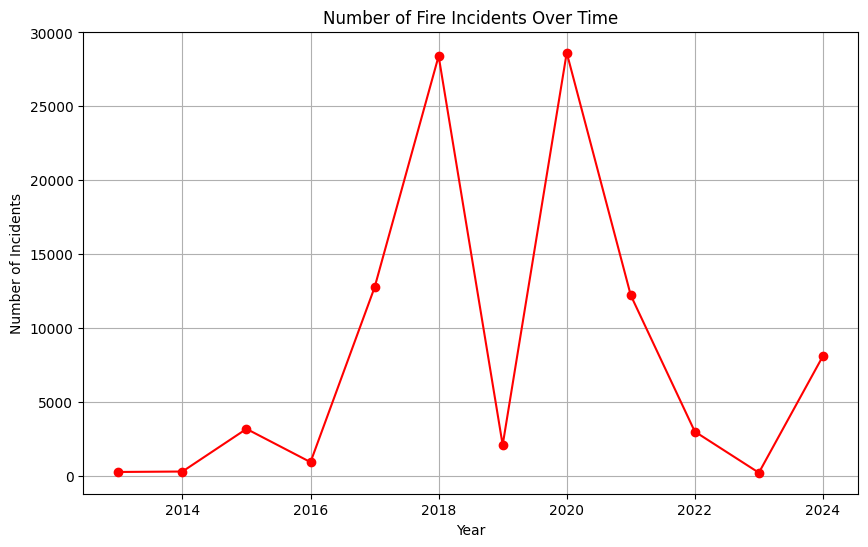

In [28]:
# Ensure 'IncidentStartDate' is in datetime format
data['IncidentStartDate'] = pd.to_datetime(data['IncidentStartDate'], errors='coerce')

# Drop rows with invalid dates
data = data.dropna(subset=['IncidentStartDate'])

# Extract the year from 'IncidentStartDate'
data['Year'] = data['IncidentStartDate'].dt.year

# Group by year and count the number of incidents
incident_counts_by_year = data['Year'].value_counts().sort_index()

# Plot the number of incidents over time
plt.figure(figsize=(10, 6))
incident_counts_by_year.plot(kind='line', marker='o', color='r')
plt.title('Number of Fire Incidents Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.show()

- Is there a seasonal pattern in fire occurrences (e.g., more fires in summer)?


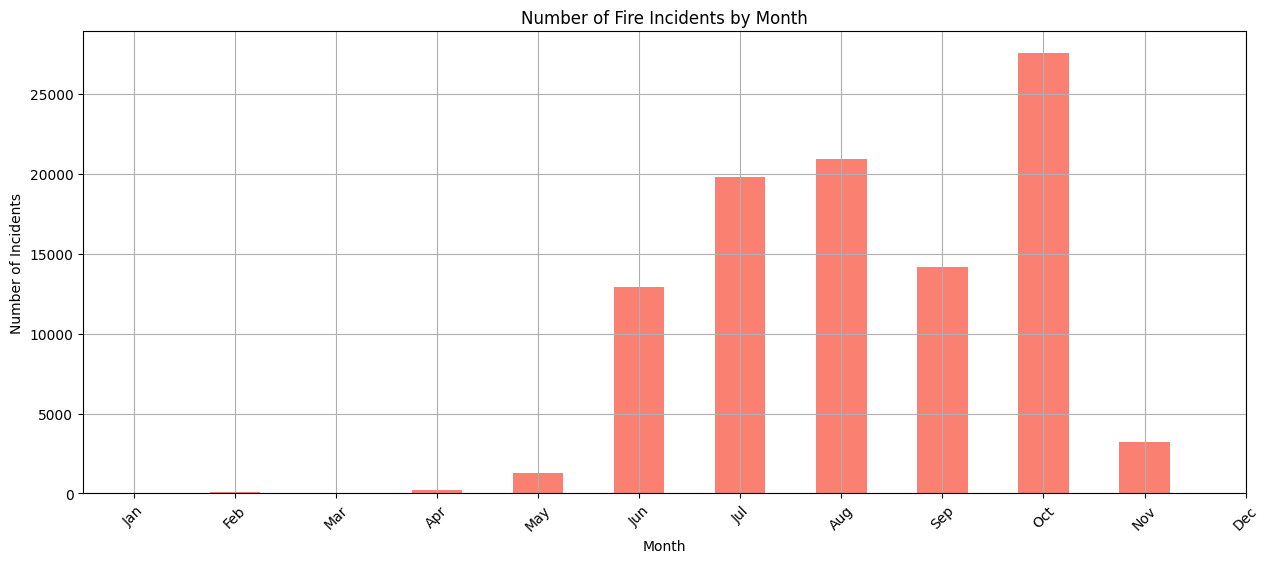

In [29]:
# Ensure 'IncidentStartDate' is in datetime format
data['IncidentStartDate'] = pd.to_datetime(data['IncidentStartDate'], errors='coerce')

# Drop rows with invalid dates
data = data.dropna(subset=['IncidentStartDate'])

# Extract the month from 'IncidentStartDate'
data['Month'] = data['IncidentStartDate'].dt.month

# Group by month and count the number of incidents
incident_counts_by_month = data['Month'].value_counts().sort_index()

# Plot the number of incidents by month
plt.figure(figsize=(15, 6))
incident_counts_by_month.plot(kind='bar', color='salmon')
plt.title('Number of Fire Incidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(True)
plt.show()

# 3 - Geographic Insights


- Which counties are fire hotspots?


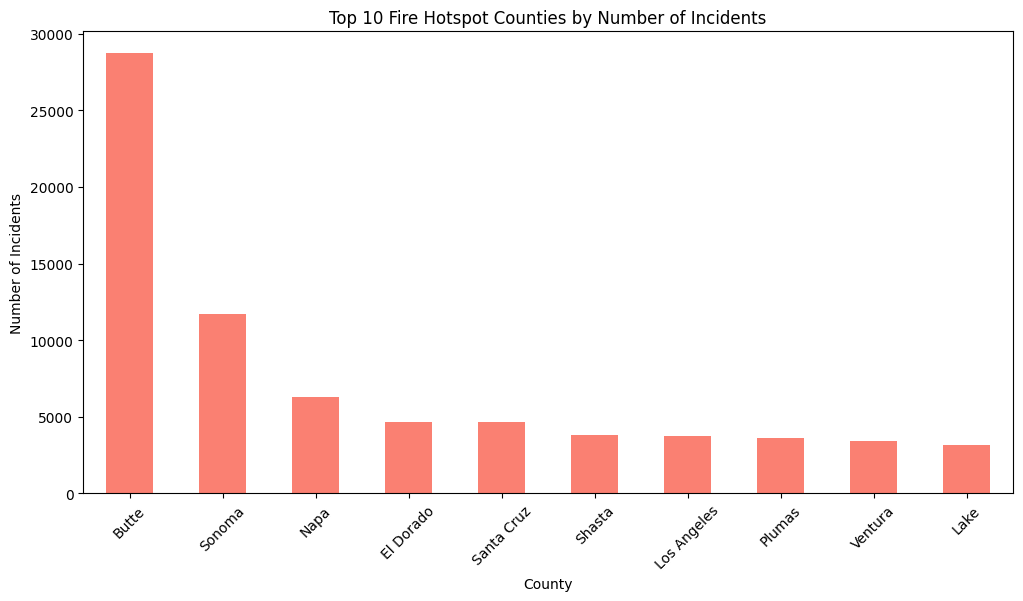

In [30]:
incident_counts_by_county = data['County'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
incident_counts_by_county.head(10).plot(kind='bar', color='salmon')
plt.title('Top 10 Fire Hotspot Counties by Number of Incidents')
plt.xlabel('County')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()


# 4 - Structural Impact


- Which structure types are most affected by fires?


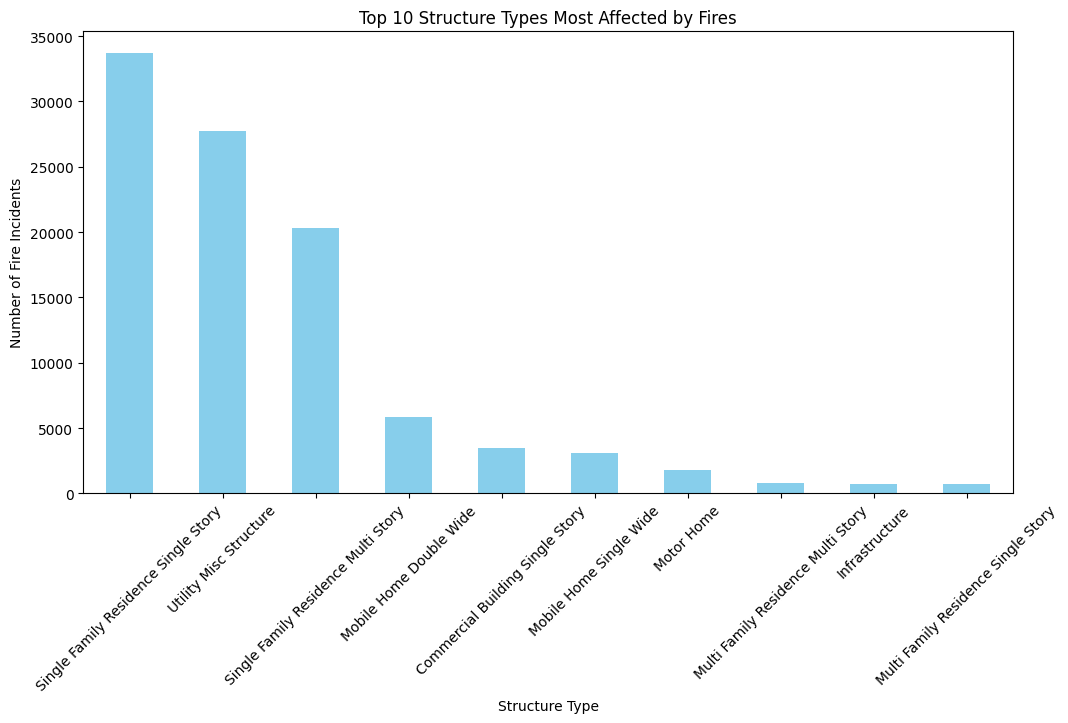

In [31]:
damage_counts = data.groupby('StructureType')['Damage'].count().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
damage_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Structure Types Most Affected by Fires')
plt.xlabel('Structure Type')
plt.ylabel('Number of Fire Incidents')
plt.xticks(rotation=45)
plt.show()


# 5 - Economic Impact

- What is the relationship between assessed property value and fire damage?


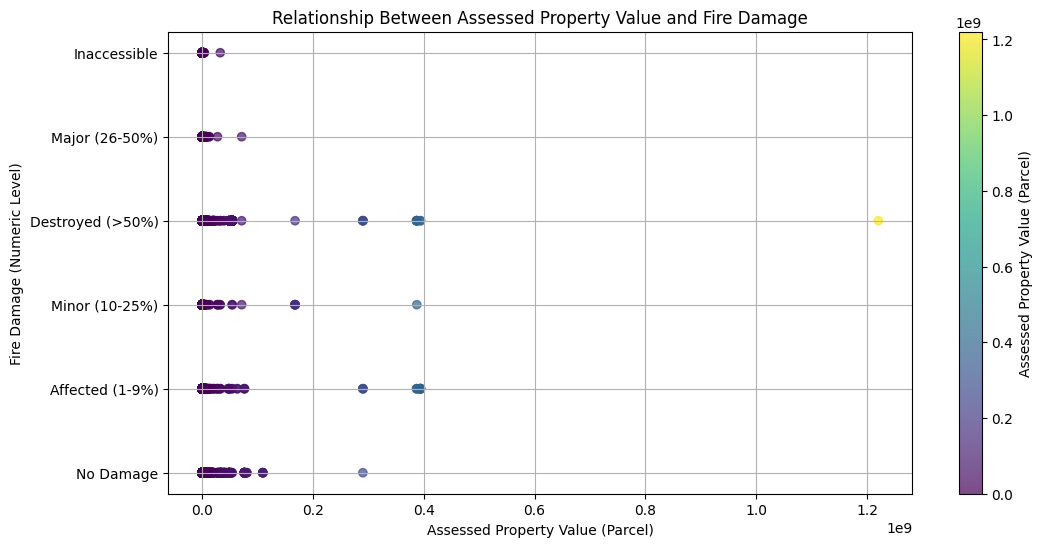

In [32]:
plt.figure(figsize=(12, 6))
scatter = plt.scatter(data['AssessedImprovedValue(parcel)'], data['Damage'], 
                       c=data['AssessedImprovedValue(parcel)'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Assessed Property Value (Parcel)')
plt.title('Relationship Between Assessed Property Value and Fire Damage')
plt.xlabel('Assessed Property Value (Parcel)')
plt.ylabel('Fire Damage (Numeric Level)')
plt.grid(True)
plt.show()


- Which counties suffered the most economic loss?


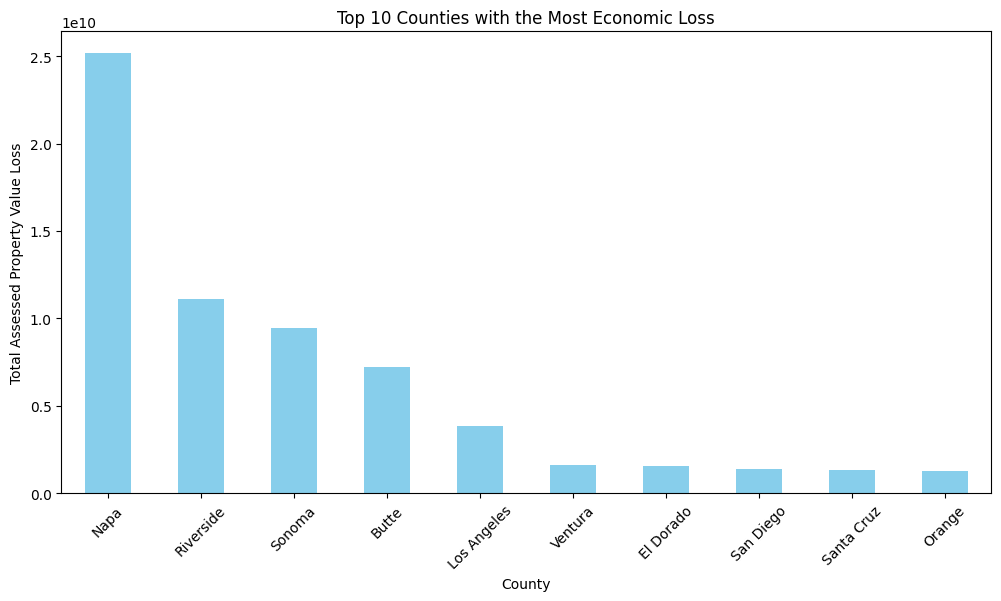

In [33]:
economic_loss_by_county = data.groupby('County')['AssessedImprovedValue(parcel)'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
economic_loss_by_county.plot(kind='bar', color='skyblue')
plt.title('Top 10 Counties with the Most Economic Loss')
plt.xlabel('County')
plt.ylabel('Total Assessed Property Value Loss')
plt.xticks(rotation=45)
plt.show()


# 6 - Incident Characteristics


- Which CAL FIRE units responded to the highest number of incidents?


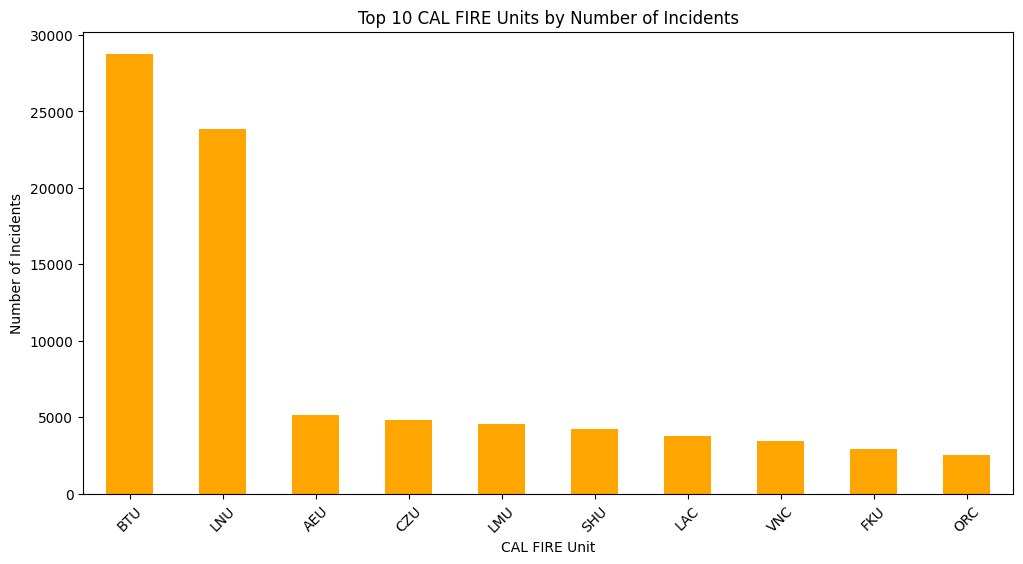

In [34]:
fire_unit_counts = data['CALFIREUnit'].value_counts().head(10)

plt.figure(figsize=(12, 6))
fire_unit_counts.plot(kind='bar', color='orange')
plt.title('Top 10 CAL FIRE Units by Number of Incidents')
plt.xlabel('CAL FIRE Unit')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()